[View in Colaboratory](https://colab.research.google.com/github/Joovvhan/ColabTest/blob/master/MNIST_Analysis_with_ResNet50.ipynb)

In [1]:
import numpy as np
import scipy.ndimage
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (7,7) # Make the figures a bit bigger

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils
from keras.layers import Input
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.layers import Flatten
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras.callbacks import ModelCheckpoint
import random

from google.colab import drive
drive.mount('/content/gdrive')



Using TensorFlow backend.


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code
Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
nb_classes = 10

# the data, shuffled and split between tran and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)
print("X_train original shape", X_test.shape)
print("y_train original shape", y_test.shape)

X_train = X_train[0:1999, :, :]
y_train = y_train[0:1999]

X_test = X_test[0:1999, :, :]
y_test = y_test[0:1999]

print("X_train 4000", X_train.shape)
print("y_train 4000", y_train.shape)
print("X_test 4000", X_train.shape)
print("y_test 4000", y_train.shape)

X_train = scipy.ndimage.zoom(X_train, (1, 8, 8), order = 0)
X_test = scipy.ndimage.zoom(X_test, (1, 8, 8), order = 0)

print("X_train resized", X_train.shape)
print("X_test resized", X_test.shape)

X_train = np.stack([X_train, X_train, X_train], -1)
X_test = np.stack([X_test, X_test, X_test], -1)

print("X_train channel multiplicated", X_train.shape)
print("X_test channel multiplicated", X_test.shape)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

print("Training matrix shape", X_train.shape)
print("Test matrix shape", X_test.shape)

11493376/11490434 [==============================] - 7s 1us/step
X_train original shape (60000, 28, 28)
y_train original shape (60000,)
X_train original shape (10000, 28, 28)
y_train original shape (10000,)
X_train 4000 (1999, 28, 28)
y_train 4000 (1999,)
X_test 4000 (1999, 28, 28)
y_test 4000 (1999,)
X_train resized (1999, 224, 224)
X_test resized (1999, 224, 224)
X_train channel multiplicated (1999, 224, 224, 3)
X_test channel multiplicated (1999, 224, 224, 3)
Training matrix shape (1999, 224, 224, 3)
Test matrix shape (1999, 224, 224, 3)


In [3]:
input_tensor = Input(shape=(224, 224, 3))
# model = ResNet50(input_tensor=input_tensor, weights='imagenet', include_top=False)
model = ResNet50(input_tensor=input_tensor, weights=None, include_top=False)
# model.summary()

new_model = Sequential()
new_model.add(model)
new_model.add(Flatten())
new_model.add(Dense(10, activation='softmax'))

new_model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

94658560/94653016 [==============================] - 13s 0us/step


In [0]:
filepath = '/content/gdrive/My Drive/Colab/weights.{epoch:02d}-{val_loss:.2f}.hdf5'
callback_model_checkpoint = [ModelCheckpoint(filepath, monitor = "val_loss", verbose = 0,
  save_best_only = True, save_weights_only = False, mode = "auto", period = 1)]

In [10]:
new_model.fit(X_train, Y_train,
          batch_size=2, epochs=4, verbose=1,
          validation_data=(X_test, Y_test),
             callbacks=callback_model_checkpoint)

Train on 1999 samples, validate on 1999 samples
Epoch 1/4
1999/1999 [==============================] - 246s 123ms/step - loss: 0.0056 - acc: 0.9982 - val_loss: 0.0363 - val_acc: 0.9909
Epoch 2/4
1999/1999 [==============================] - 246s 123ms/step - loss: 0.0028 - acc: 0.9993 - val_loss: 0.0222 - val_acc: 0.9933
Epoch 3/4
1999/1999 [==============================] - 246s 123ms/step - loss: 0.0026 - acc: 0.9995 - val_loss: 0.0760 - val_acc: 0.9796
Epoch 4/4
1999/1999 [==============================] - 246s 123ms/step - loss: 0.0076 - acc: 0.9973 - val_loss: 0.0589 - val_acc: 0.9851


In [9]:
new_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 1, 1, 2048)        23587712  
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                20490     
Total params: 23,608,202
Trainable params: 23,555,082
Non-trainable params: 53,120
_________________________________________________________________


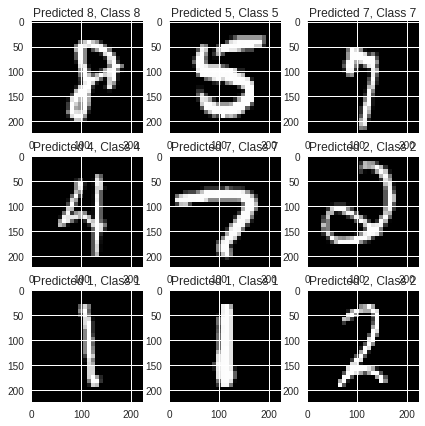

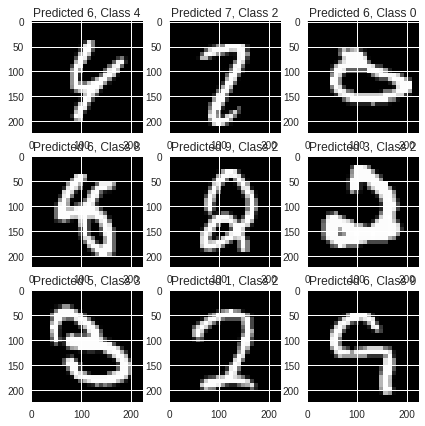

In [11]:
# The predict_classes function outputs the highest probability class
# according to the trained classifier for each input example.
predicted_classes = new_model.predict_classes(X_test)

# Check which items we got right / wrong
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

plt.figure()
for i, correct in enumerate(correct_indices[random.sample(range(0, len(correct_indices)), 9)]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(224, 224, 3), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    
plt.figure()
for i, incorrect in enumerate(incorrect_indices[random.sample(range(0, len(incorrect_indices)), 9)]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(224, 224, 3), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))

In [7]:
from keras.models import load_model
new_model.summary()
new_model.save('ResNet50_MNIST_Model.h5')  # creates a HDF5 file 'my_model.h5'
del new_model  # deletes the existing model

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 1, 1, 2048)        23587712  
_________________________________________________________________
flatten_2 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                20490     
Total params: 23,608,202
Trainable params: 23,555,082
Non-trainable params: 53,120
_________________________________________________________________


In [0]:
model = load_model('ResNet50_MNIST_Model.h5')

In [0]:
# The predict_classes function outputs the highest probability class
# according to the trained classifier for each input example.
predicted_classes = model.predict_classes(X_test)

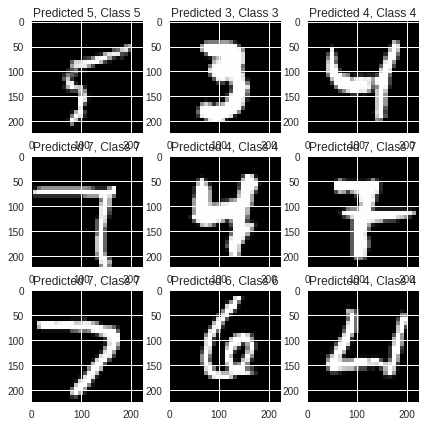

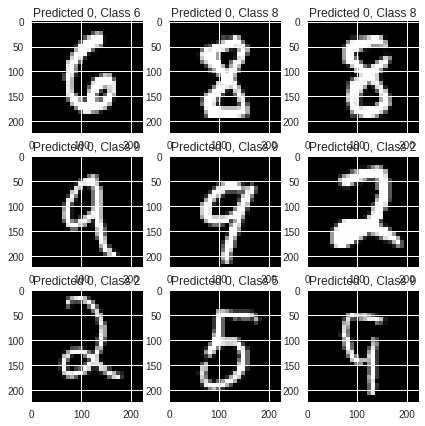

In [15]:
# Check which items we got right / wrong
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

plt.figure()
for i, correct in enumerate(correct_indices[random.sample(range(0, len(correct_indices)), 9)]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(224, 224, 3), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    
plt.figure()
for i, incorrect in enumerate(incorrect_indices[random.sample(range(0, len(incorrect_indices)), 9)]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(224, 224, 3), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))